# Customized figures

In this example we will show how to get fancy figures generated by nauyaca to include in your research. We will use the results from the 'simple_fit' example. In that example, we solved a system with three planets.

In [1]:
import nauyaca as nau
import matplotlib.pyplot as plt

### Two planets

Let's load the planetary system we saved in the customized_fit example:

In [2]:
PS = nau.PlanetarySystem.load_json("./outputs/System-X.json")

--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06  
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06  


Now, let's make different pre-build figures from the Plots module. First, we instantiate the module and specify custom properties for the figures.

In [3]:
naup = nau.Plots(
        PS,  # The Planetary System object   
        hdf5_file='./outputs/Custom_hdf5_mcmc.hdf5', # The hdf5 file 
        burnin = 0.25,    # The figures will take results after the burnin lenght
        sns_context= 'poster',    # The 'context' kwarg in seaborn.set(), options: 'notebook', 'paper', 'talk', 'poster'
        sns_style='white'   # The 'style' kwarg in seaborn.set()
        ) 

Take random samples from posteriors and draw the TTVs

--> plotting best solutions


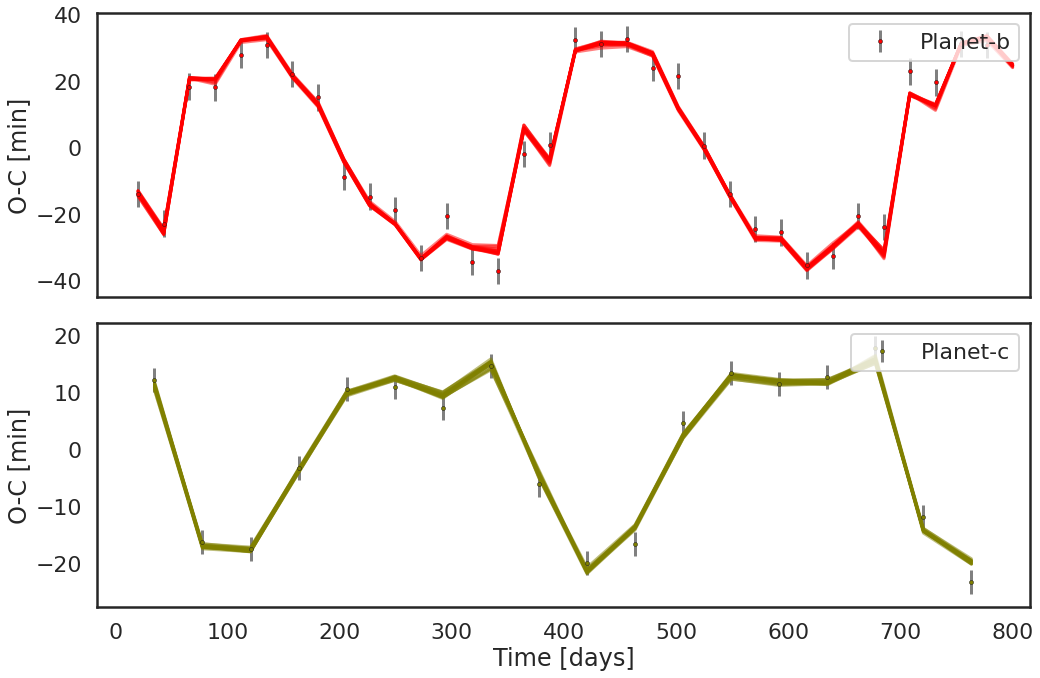

In [4]:
ttvs = naup.TTVs(nsols=15,  # number of solutions to plot
             mode='best',  # taking 'random' or the 'best' solutions
             show_obs=True,  # Show data points
             residuals = False,  # Plot residuals just below the TTVs
             size=(15,10) # figure size
             )

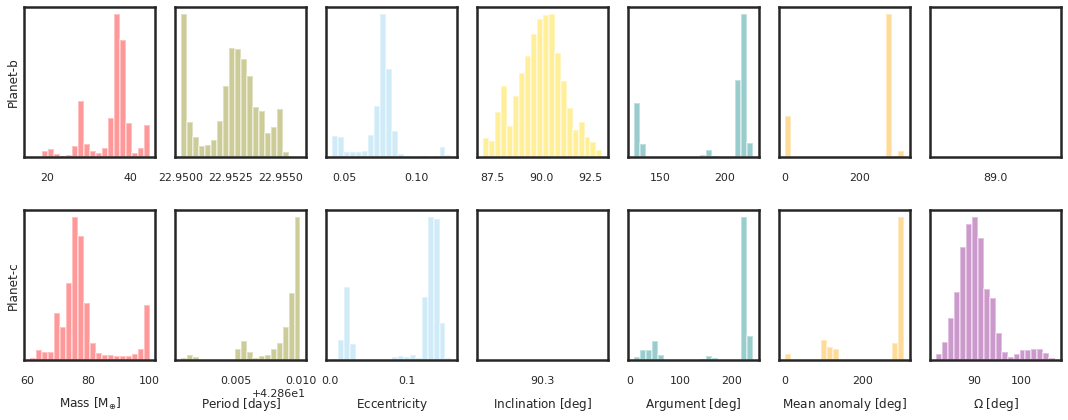

In [5]:
naup.sns_font = 0.5  #The 'font_scale' kwarg in seaborn.set(), by default 1. It scales the font size of the axes.

histograms = naup.hist(titles=False,
                      size=(15,6))

Changing colors is too easy as passing a dictionary of seven elements to Plots. For clarity, same parameters are colored with the same color for all planets

In [6]:
my_colors = {0:"k", 1:"#581845" , 2: "#900C3F", 3: "#C70039", 4: "#FF5733", 5: "#FFC30F", 6: "yellow"}

### Three planets
Let's inspect the results from the simple_fit example:

In [7]:
PS = nau.PlanetarySystem.load_json("MySystem.json")

--> Parameter -mass- of planet -Planet-b- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06  
--> Parameter -mass- of planet -Planet-c- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06  
--> Parameter -mass- of planet -Planet-d- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-d- set to lower physical limit: 1e-06  


In [8]:
# A new class instance
naup = nau.Plots(PS, 
                 hdf5_file='MySystem.hdf5',
                 burnin = 0.2, 
                 sns_context= 'paper', 
                 sns_style='white',
                 colors = my_colors
                 ) 

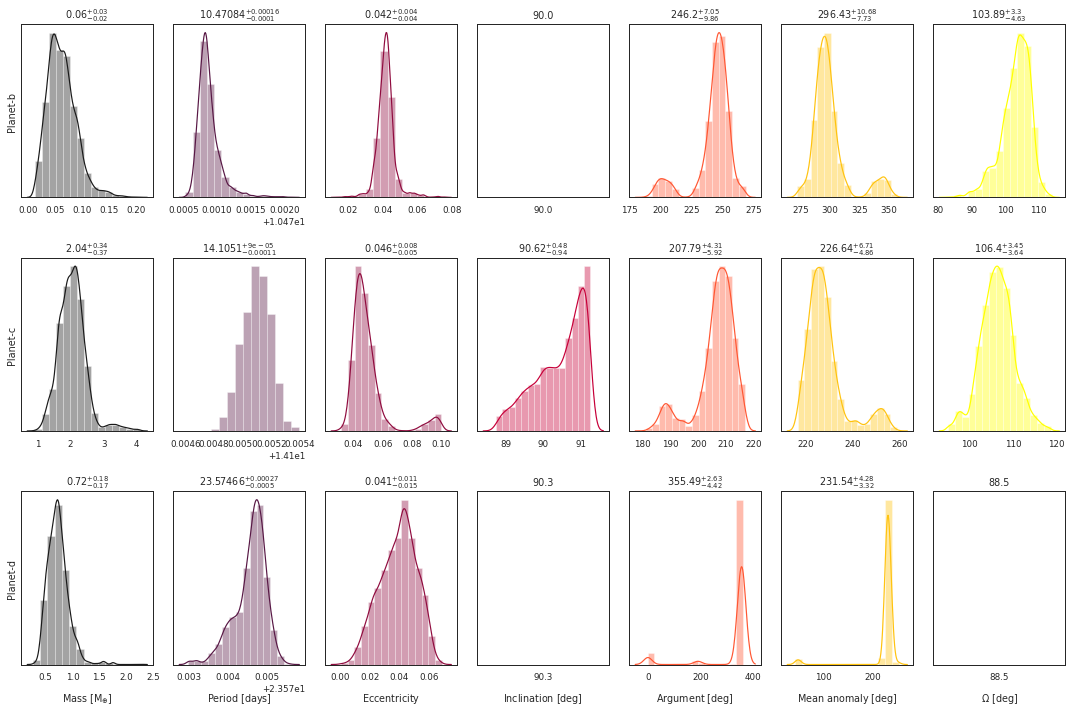

In [9]:
histograms = naup.hist(titles=True,
                  size=(15,10),
                  hist_kwargs={'kde':True, 'bins':15}  # Add features to the histogras through the seaborn sns.distplot()
                 )

It's applicable to trace plot:

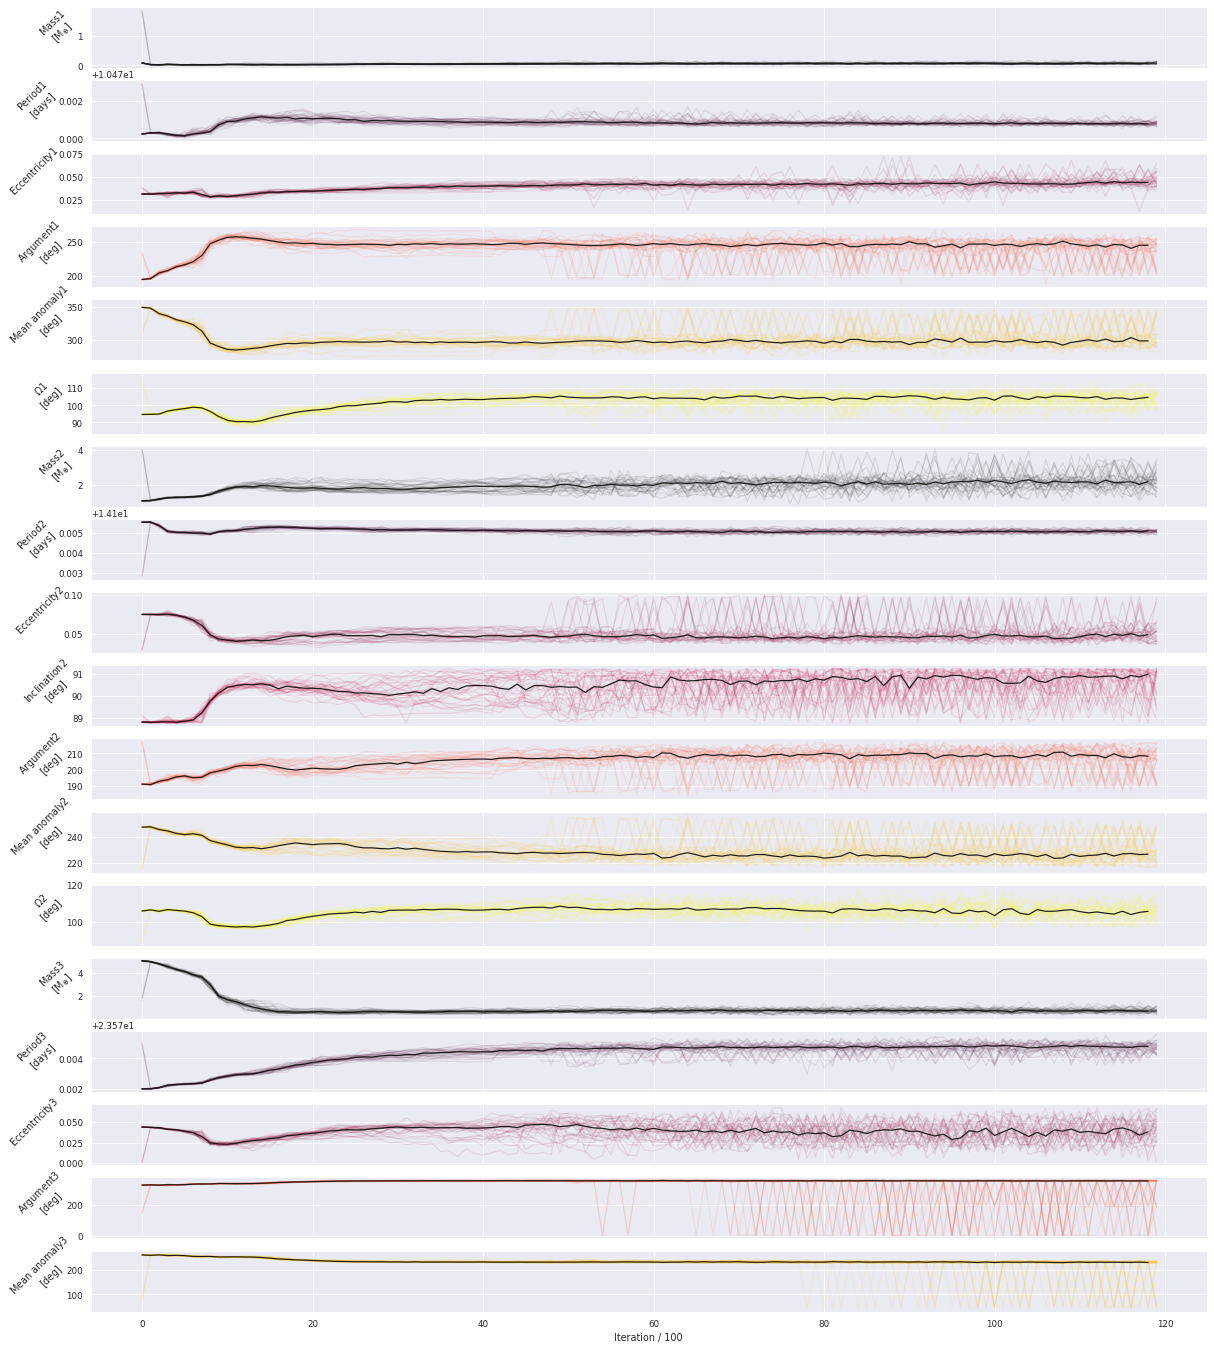

In [10]:
naup.sns_style = 'darkgrid'

trace = naup.trace_plot(plot_means=True,  # It makes a dark line to guide the eye where the mean is
                thin=2)  #  A thining factor to plot less chains. Useful when plotting many chains along many steps

Colors can be also changed by passing the dictionary to the class attribute:

In [11]:
# Note that only 3 colors are given so it wouldn't be enough for making plots as above
naup.colors = {0: "#581845", 1: "#C70039", 2: "#FFC30F"} 

--> plotting best solutions


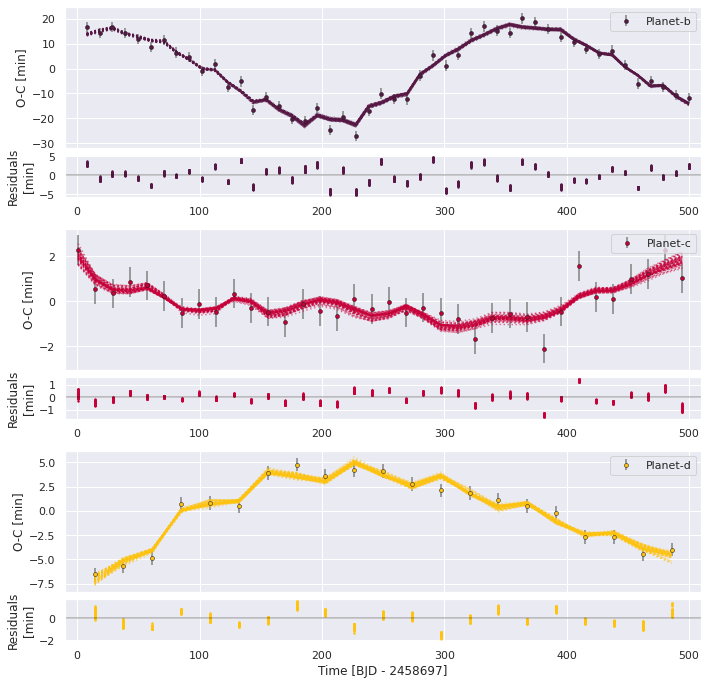

In [12]:
naup.sns_context='notebook'

ttvs = naup.TTVs(nsols=50, mode='best',
                 line_kwargs={'alpha':0.5, 'ls': ':'},  # Change line properties
                 xlabel='Time [BJD - 2458697]') # The label to put on the x axis

A corner plot using the corner package (https://corner.readthedocs.io/en/latest/). Make a proper cite if you use it

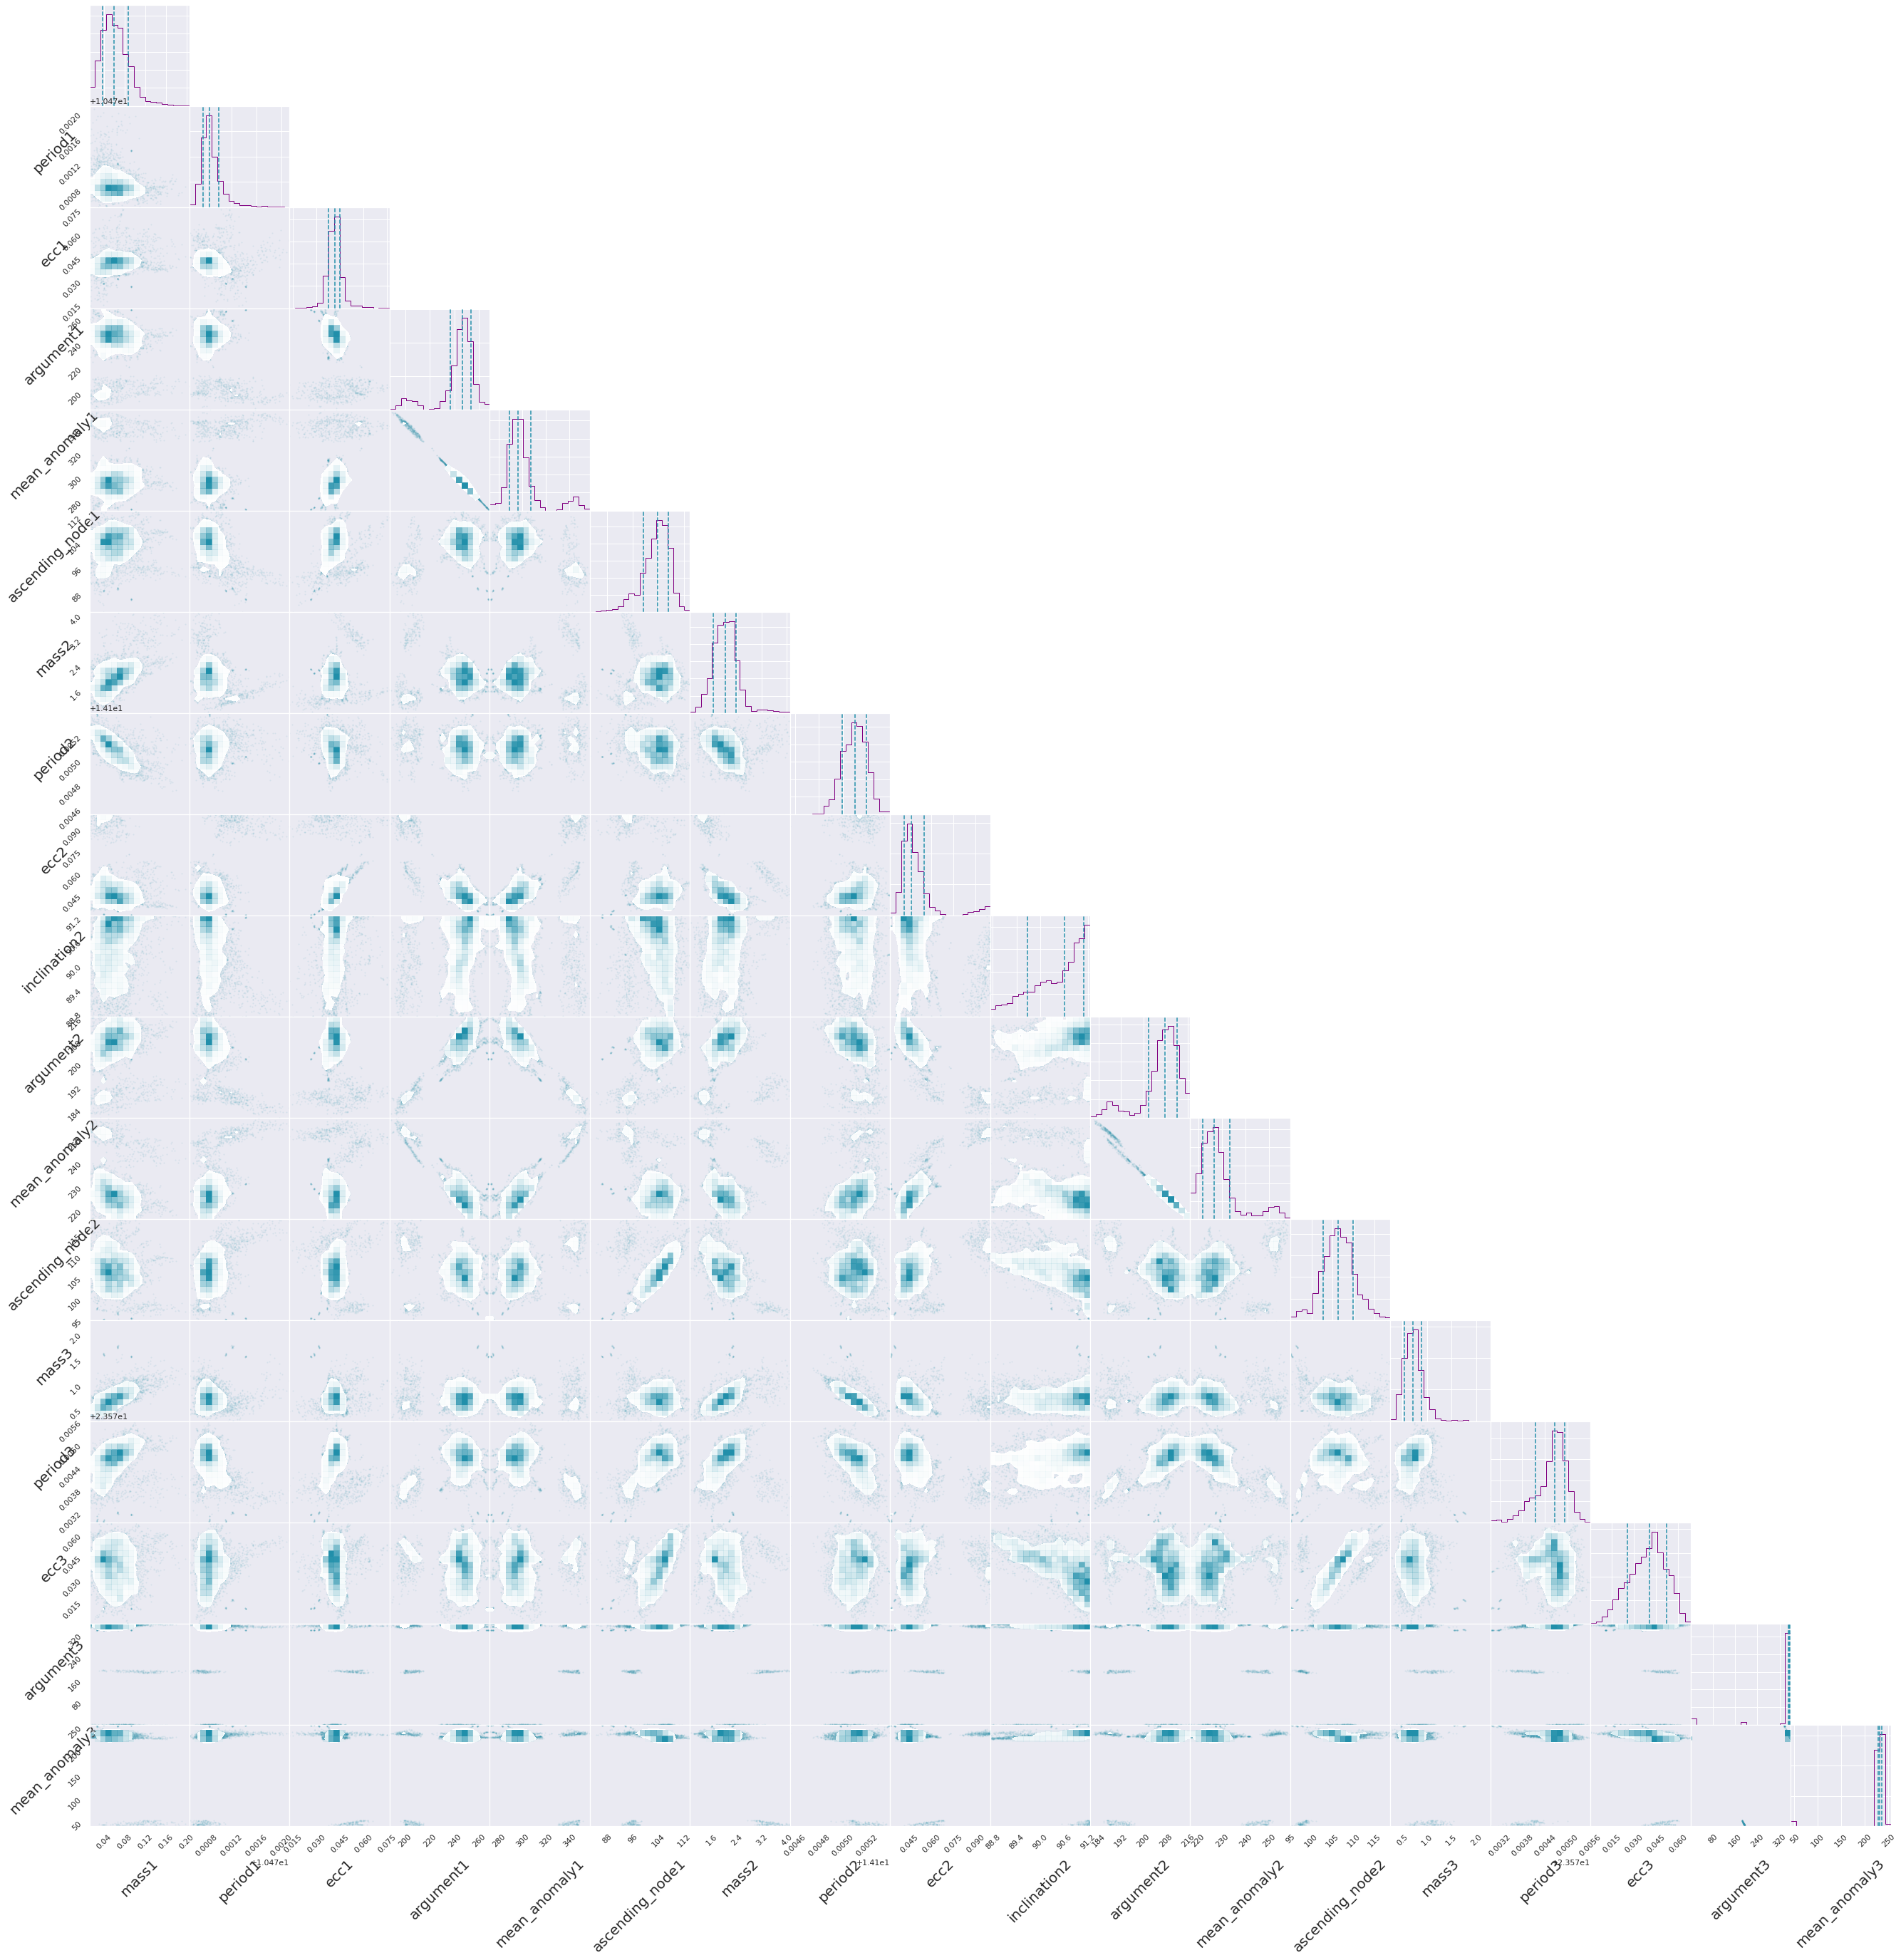

In [13]:
corner = naup.corner_plot(color="#218FAA",   
                         corner_kwargs={"smooth":False, # kwargs for corner.corner()
                                        "plot_contours":False, 
                                        "plot_density": True,
                                        "bins":18,
                                        "hist_kwargs": {'color':'purple', 'rwidth':1}, # kwargs for histograms
                                        "label_kwargs": {"fontsize": 20, "rotation": 45}, # kwargs for labels
                               })

______